In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_130221.txt' #QD_16
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_131312.txt' #QD_17 (1)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_132234.txt' #QD_17 (2)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_133514.txt' #QD_18
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_135834.txt' #QD_20
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_141643.txt' #QD_21
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_164047.txt' #QD_23 (1)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_164648.txt' #QD_23 (2)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_172516.txt' #QD_24 (1)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_172834.txt' #QD_24 (2)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_143908.txt' #QD_27
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_145037.txt' #QD_28
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_154014.txt' #QD_29

# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-17_132552.txt' #QD_40
file_name = 'C:/Users/HP/Downloads/Histogram_2025-03-10_160635.txt' #QD_49

In [3]:
data = pd.read_csv(file_name, sep="\t")  # Read the file with tab as the delimiter

# Extract the columns
x = data["Time (ps)"] / 1000 # Time in ns
y = data["Counts per bin"]

In [4]:
def plot_lineal(x, y, fit_ini, width, height, font_size):

    plt.figure(figsize=(width, height))  # Define el tamaño de la figura
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x[fit_ini::] - min(x), y[fit_ini::], marker='o', color='red', markersize=1, linestyle='-', linewidth=1, label='Fitting points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Histogram Plot (Linear Scale)')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_logarithmic(x, y, fit_ini, width, height, font_size):
    
    plt.figure(figsize=(width, height))  # Define el tamaño de la figura
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x[fit_ini::] - min(x), y[fit_ini::], marker='o', color='red', markersize=1, linestyle='-', linewidth=1, label='Fitting')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Histogram Plot (Logarithmic Scale)')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin (log scale)', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.grid(True, which="both")  # Enable grid for both major and minor ticks
    plt.legend(fontsize=font_size)
    
    plt.show()


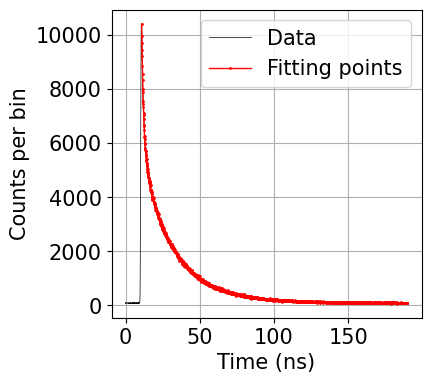

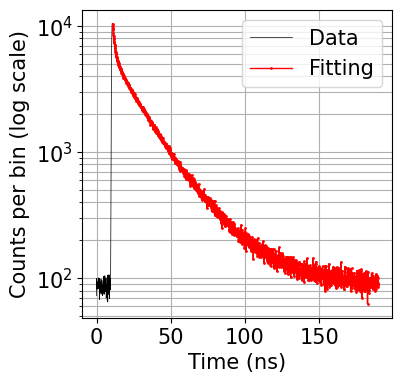

In [19]:
width = 4 
height = 4
font_size = 15

i_ini = 600 # Inital index of the plot
i_end = 2500 # Final index of the plot
fit_ini = 108 # Initial index for the fit

plot_lineal(x[i_ini:i_end], y[i_ini:i_end], fit_ini, width, height, font_size)
plot_logarithmic(x[i_ini:i_end], y[i_ini:i_end], fit_ini, width, height, font_size)

In [20]:
def exp_func(x, A, B_1, x_0_1, tau_1, B_2, x_0_2, tau_2):
        return A + B_1 * np.exp(-(x - x_0_1) / tau_1) + B_2 * np.exp(-(x - x_0_2) / tau_2)

def fit_exponential(x, y):
    
    params, pcov = curve_fit(exp_func, x, y, p0=[np.min(y), np.max(y)-np.min(y), np.min(x), 6.0, np.max(y)-np.min(y), np.min(x), 0.4])
    return params, pcov

def plot_fit_lineal(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func(x_fit, *params)
    
    plt.figure(figsize=(width, height))
    plt.plot(x - min(x), y / 1000, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5)
    plt.plot(x_fit - min(x), y_fit / 1000, marker='o', color='green', markersize=0, linestyle='-', linewidth=1, label='Fitted points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin (×10³)', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_fit_logarithmic(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func(x_fit, *params)
    
    plt.figure(figsize=(width, height))
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5)
    plt.plot(x_fit - min(x), y_fit, marker='o', color='green', markersize=0, linestyle='-', linewidth=1, label='Fitted graph')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()

A: 108.891 ± 1.099 counts

B_1: 15339.415 ± 1577541471.446 counts
t_0_1: 48.199 ± 2218889.841 ns
tau_1: 21.590 ± 0.040 ns

B_2: 416856.750 ± 41756393104.295 counts
t_0_2: 64.088 ± 150693.591 ns
tau_2: 1.504 ± 0.010 ns


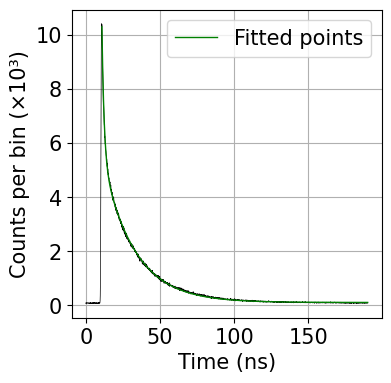

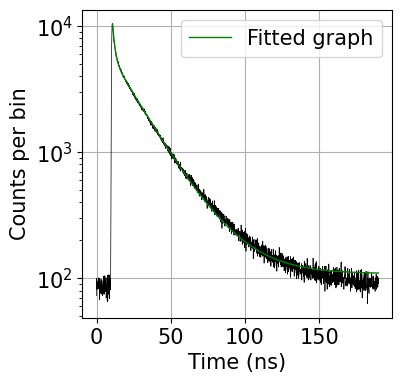

In [21]:
params, pcov = fit_exponential(x[(i_ini + fit_ini):i_end], y[(i_ini + fit_ini):i_end])

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))

print(f"A: {params[0]:.3f} ± {perr[0]:.3f} counts\n")
print(f"B_1: {params[1]:.3f} ± {perr[1]:.3f} counts")
print(f"t_0_1: {params[2]:.3f} ± {perr[2]:.3f} ns")
print(f"tau_1: {params[3]:.3f} ± {perr[3]:.3f} ns\n")
print(f"B_2: {params[4]:.3f} ± {perr[4]:.3f} counts")
print(f"t_0_2: {params[5]:.3f} ± {perr[5]:.3f} ns")
print(f"tau_2: {params[6]:.3f} ± {perr[6]:.3f} ns")

plot_fit_lineal(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)
plot_fit_logarithmic(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)